In [1]:
#--------Import packages
#--------For Netcdf manipulation
import statsmodels.tsa.stattools
import xarray as xr
from netCDF4 import Dataset
import netCDF4 as nc

#--------For array manipulation
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Grouper

#--------For plotting
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap # plots maps
from matplotlib.cbook import dedent
#import cmocean
import seaborn as sns

In [2]:
#-----Read in volume dataset as dataframe
vol_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/vol_mean_w.csv')
#-----Read in SAM as dataframe
sam_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/sam_long.csv',parse_dates=['Dates'])
#-----Read in dates  as dataframe
dates_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/dates_df.csv')

In [3]:
dates_df['Dates'] = dates_df['Dates'].astype('datetime64[ns]')
sam_df = sam_df.drop(["Years", "Months"], axis=1)

# Get dates  for only May -October
sam_df = sam_df[(sam_df.Dates.dt.month >= 5) & (sam_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
sam_df = sam_df.set_index('Dates')
sam_df = sam_df.loc['2002-05-01':'2018-10-01']
## Removing the first 5 rows/dates
sam_df  = sam_df.iloc[5:]

In [4]:
# we now want the 'Dates' as a normal column and not an index
sam_df = sam_df.reset_index()
# Combining the SAM and SIV Dates
df_new = sam_df.copy()
df_new["SIV"] = vol_df["SIV"]

In [5]:
df_new

,Dates,SAM,SIV
0,2007-05-01,-1.02,950.837862
1,2008-05-01,-0.66,1093.023526
2,2009-05-01,-0.14,1178.850939
3,2010-05-01,1.51,1241.755970
4,2011-05-01,1.37,1266.581174
...,...,...,...
92,2014-10-01,1.32,1482.574281
93,2015-10-01,-0.66,1510.433459
94,2016-10-01,-0.89,1626.566458
95,2017-10-01,-0.64,1516.098355


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *
dir = '/Users/fridaperez/Developer/repos/local_repo/pub_plots/Weddell/'
def month_ccf_sam(df):
    x = [5,6,7,8,9,10]
    df_selmons = []
    df_vol_selmons = []
    df_sam_selmons = []
    cdfs = []
    df_list = []
    ind0 = 0
    for i in x:
        df_selmon = df[df['Dates'].dt.month.isin([i])]
        ccf_df = statsmodels.tsa.stattools.ccf(df_selmon.SAM, df_selmon.SIV, adjusted=False)
        ccf_df = pd.DataFrame(ccf_df, columns=['CCF'])
        df_selmons.append(df_selmon)
        print(ccf_df)
        cdfs.append(ccf_df)
        ## Separate the two columns
        # SIV #
        df_vol_selmon = df_selmon[['Dates', 'SIV']]
        df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
        df_vol_selmon = df_vol_selmon.set_index(['Dates'])
        df_vol_selmons.append(df_vol_selmon)
        # SAM #
        df_sam_selmon = df_selmon[['Dates', 'SAM']]
        df_sam_selmon['Dates'] = df_sam_selmon['Dates'].dt.to_period('M')
        df_sam_selmon = df_sam_selmon.set_index(['Dates'])
        df_sam_selmons.append(df_sam_selmon)
        #return cdfs
    # PLOT #
    for x in range(6):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
        lag = 0
        for i in range(6):
            row =0 if i <= 2 else 1
            col = i if i <=2 else i-3
            lowess = sm.nonparametric.lowess(df_vol_selmons[x].iloc[:, 0], df_sam_selmons[x].iloc[:, 0].shift(lag))
            axes[row, col].scatter(df_sam_selmons[x].shift(lag), df_vol_selmons[x])
            axes[row, col].set_title(f"SAM (t-{lag})")
            axes[row, col].set_ylabel("SIV (t)")
            axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
            axes[row, col].text(s=round(cdfs[x].loc[i][0],3), x = .95, y = 0.05, transform = axes[row, col].transAxes, ha = 'right') #ha, horizontal line
            lag += 1
        fig.tight_layout()
        plt.savefig(dir + str(x))


/Users/fridaperez/miniconda3/envs/basemap_stable/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


         CCF
0   0.100316
1   0.502855
2   0.148137
3  -0.056262
4  -0.430827
5  -0.122132
6   0.039305
7   0.232161
8   0.012780
9   0.051009
10 -0.176690
11  0.018554
         CCF
0  -0.018152
1  -0.182376
2  -0.406445
3   0.084120
4   0.299869
5   0.200926
6   0.098668
7  -0.128388
8  -0.203753
9   0.016699
10  0.263241
11  0.199548
12  0.167075
13 -0.097013
14 -0.203525
15 -0.025177
16  0.054208
         CCF
0  -0.177879
1  -0.238547
2   0.223565
3   0.052086
4   0.353878
5   0.271184
6  -0.019088
7  -0.117459
8   0.121800
9  -0.160755
10 -0.124798
11 -0.064914
12 -0.135171
13 -0.035543
14  0.053403
15  0.031673
16  0.004804
         CCF
0   0.157832
1   0.085181
2   0.052214
3   0.105837
4  -0.229816
5   0.070401
6   0.010855
7   0.010052
8   0.075997
9   0.147071
10 -0.109443
11 -0.138547
12  0.043231
13  0.014132
14  0.039482
15  0.011354
16 -0.001868
         CCF
0  -0.115322
1  -0.005615
2   0.153734
3  -0.063701
4  -0.270482
5  -0.331031
6  -0.090858
7  -0.036950
8   0.111013

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_43875/335481543.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_43875/335481543.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sam_selmon['Dates'] = df_sam_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_43875/335481543.py:28: SettingWithCopyWarning: 
A value is trying

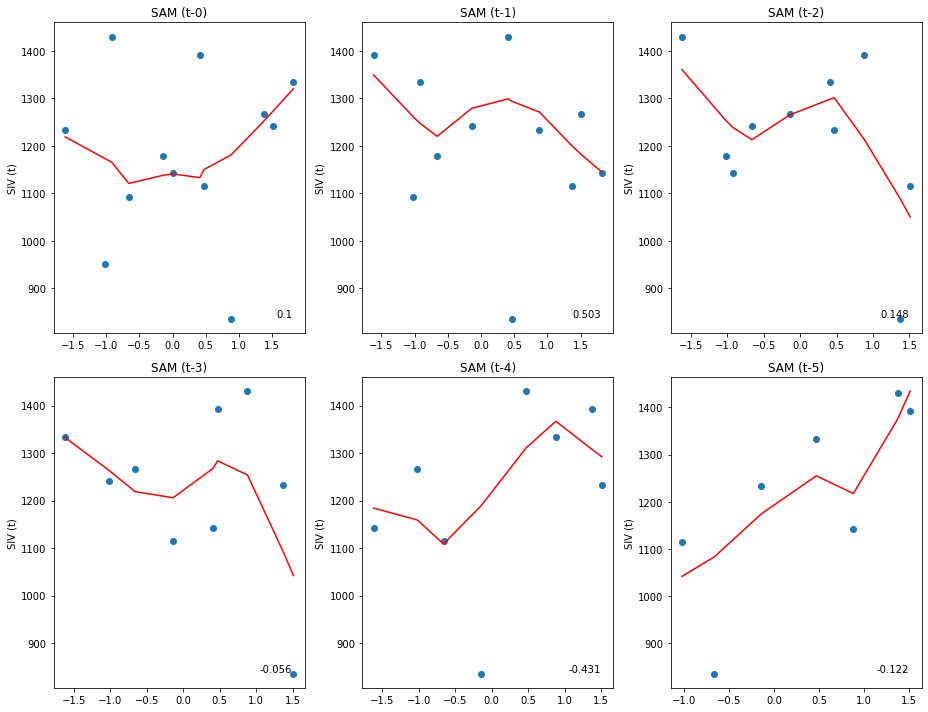

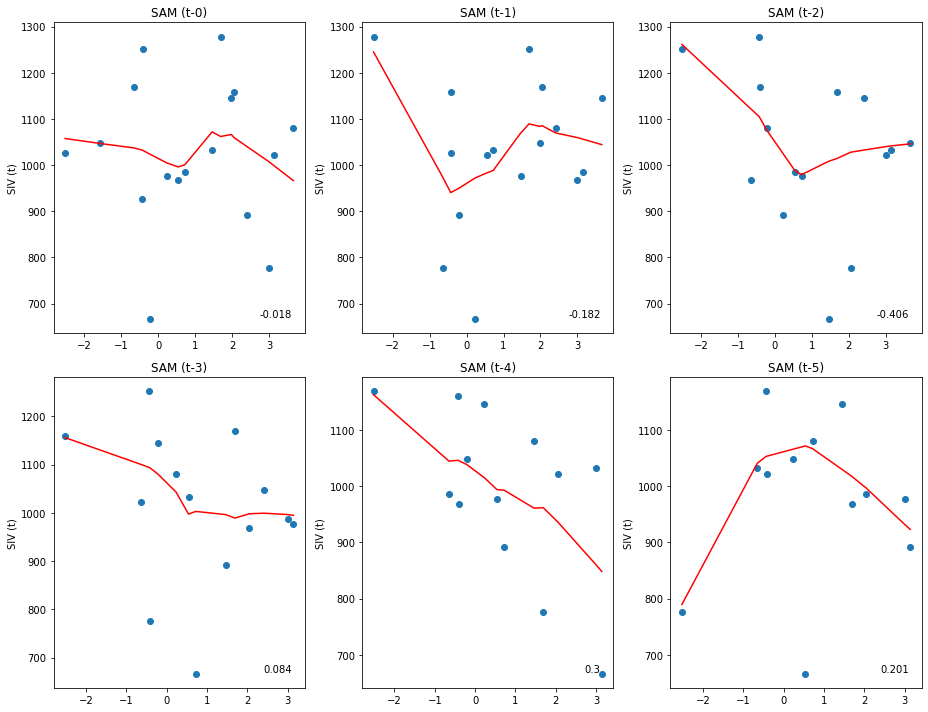

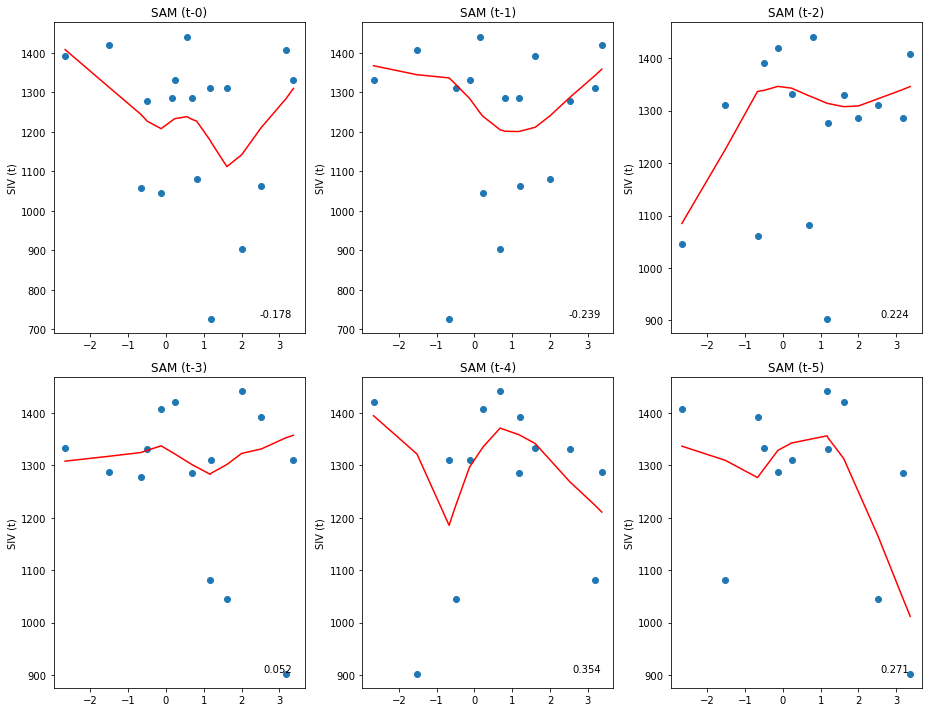

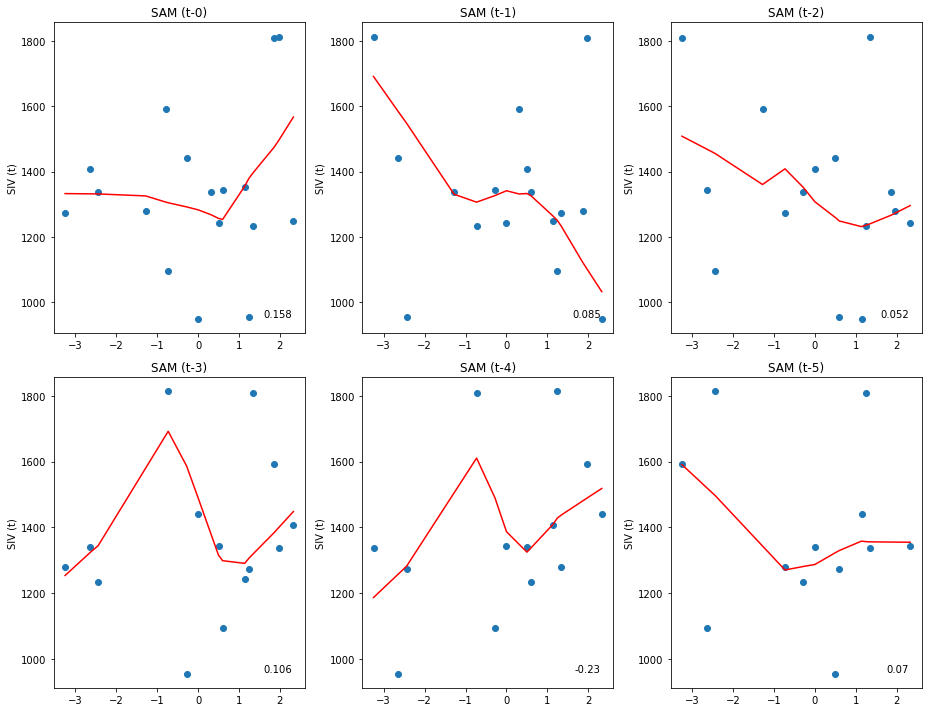

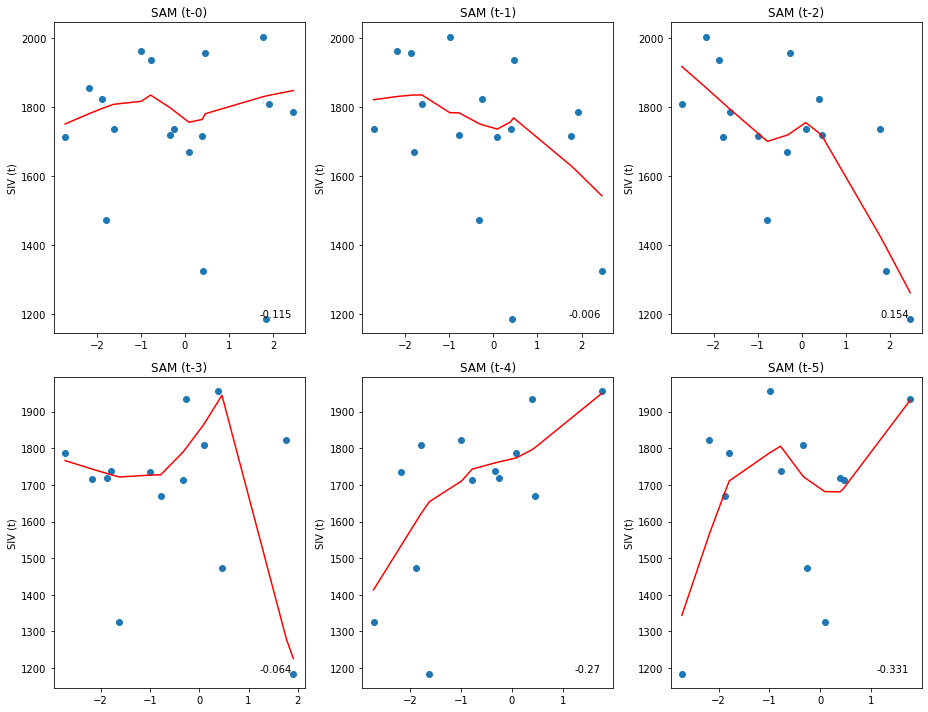

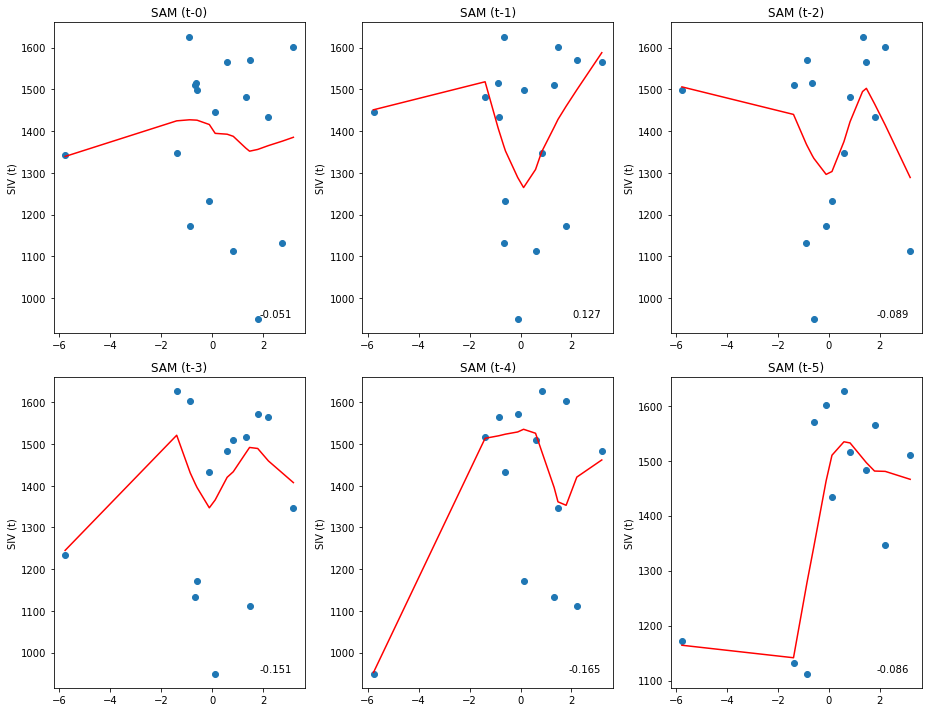

In [7]:
month_ccf_sam(df_new)

## SOI

In [8]:
#-----Read in SOI as dataframe
soi_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/SOI_index.csv')

In [9]:
# have to use pandas melt to go from wide to long data
soi_melt = pd.melt(soi_df, id_vars='Years')
soi_melt = soi_melt.rename(columns={"variable":"Month"})
soi_melt['Dates'] = pd.to_datetime(soi_melt[['Years', 'Month']].assign(DAY=1))

In [10]:
soi_melt = soi_melt.drop(["Years", "Month"], axis=1)
soi_melt['Dates'] = soi_melt['Dates'].astype('datetime64[ns]')

In [11]:
# Get dates  for only May -October
soi_melt = soi_melt[(soi_melt.Dates.dt.month >= 5) & (soi_melt.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
soi_melt = soi_melt.set_index('Dates')
soi_melt = soi_melt.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
soi_melt  = soi_melt.iloc[5:]

In [12]:
# # we now want the 'Dates' as a normal column and not an index
soi_melt = soi_melt.reset_index()
soi_melt.rename(columns={'SOI': 'value'}, inplace=True)

# # Combining the SAM and SIV Dates
df_new_soi = soi_melt.copy()
df_new_soi["SIV"] = vol_df["SIV"]


In [13]:
df_new_soi.reset_index()

,index,Dates,value,SIV
0,0,2007-05-01,0.9,950.837862
1,1,2008-05-01,1.3,1093.023526
2,2,2009-05-01,-0.3,1178.850939
3,3,2010-05-01,-0.7,1241.755970
4,4,2011-05-01,1.1,1266.581174
...,...,...,...,...
92,92,2014-10-01,1.0,1482.574281
93,93,2015-10-01,3.2,1510.433459
94,94,2016-10-01,-0.2,1626.566458
95,95,2017-10-01,-1.2,1516.098355


In [14]:
df_new_soi.rename(columns = {'value':'SOI'}, inplace = True)

In [15]:
df_new_soi

,Dates,SOI,SIV
0,2007-05-01,0.9,950.837862
1,2008-05-01,1.3,1093.023526
2,2009-05-01,-0.3,1178.850939
3,2010-05-01,-0.7,1241.755970
4,2011-05-01,1.1,1266.581174
...,...,...,...
92,2014-10-01,1.0,1482.574281
93,2015-10-01,3.2,1510.433459
94,2016-10-01,-0.2,1626.566458
95,2017-10-01,-1.2,1516.098355


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


def month_ccf_soi(df):
    x = [5, 6, 7, 8, 9, 10]
    df_selmons = []
    df_vol_selmons = []
    df_soi_selmons = []
    cdfs = []
    for i in x:
        df_selmon = df[df['Dates'].dt.month.isin([i])]
        ccf_df = statsmodels.tsa.stattools.ccf(df_selmon.SOI, df_selmon.SIV, adjusted=False)
        ccf_df = pd.DataFrame(ccf_df, columns=['CCF'])
        df_selmons.append(df_selmon)
        print(ccf_df)
        cdfs.append(ccf_df)
        ## Separate the two columns
        # SIV #
        df_vol_selmon = df_selmon[['Dates', 'SIV']]
        df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
        df_vol_selmon = df_vol_selmon.set_index(['Dates'])
        df_vol_selmons.append(df_vol_selmon)
        # SOI #
        df_soi_selmon = df_selmon[['Dates', 'SOI']]
        df_soi_selmon['Dates'] = df_soi_selmon['Dates'].dt.to_period('M')
        df_soi_selmon = df_soi_selmon.set_index(['Dates'])
        df_soi_selmons.append(df_soi_selmon)
        #return cdfs
    # PLOT #
    for x in range(6):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
        lag = 0
        for i in range(6):
            row = 0 if i <= 2 else 1
            col = i if i <= 2 else i - 3
            lowess = sm.nonparametric.lowess(df_vol_selmons[x].iloc[:, 0], df_soi_selmons[x].iloc[:, 0].shift(lag))
            axes[row, col].scatter(df_soi_selmons[x].shift(lag), df_vol_selmons[x])
            axes[row, col].set_title(f"SOI (t-{lag})")
            axes[row, col].set_ylabel("SIV (t)")
            axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
            axes[row, col].text(s=round(cdfs[x].loc[i][0], 3), x=.95, y=0.05, transform=axes[row, col].transAxes,
                                ha='right')  #ha, horizontal line
            lag += 1
        fig.tight_layout()
        plt.savefig(dir + str(x))



         CCF
0   0.187395
1   0.014290
2  -0.080975
3   0.324538
4   0.049731
5  -0.051988
6   0.051922
7  -0.072643
8  -0.172833
9   0.084706
10 -0.062559
11 -0.098956
         CCF
0   0.118750
1  -0.062563
2  -0.081705
3  -0.309513
4  -0.126665
5   0.344456
6   0.024966
7  -0.060770
8  -0.088716
9  -0.400242
10 -0.130938
11  0.133763
12  0.042203
13  0.135147
14  0.127976
15 -0.025459
16 -0.035434
         CCF
0  -0.384663
1  -0.000844
2  -0.033904
3  -0.100630
4  -0.149539
5  -0.179281
6  -0.138213
7   0.264933
8   0.242573
9   0.296815
10  0.187877
11 -0.188989
12 -0.347729
13 -0.023513
14  0.124392
15  0.155925
16  0.044666
         CCF
0   0.582903
1  -0.068455
2  -0.550201
3  -0.298724
4  -0.277614
5   0.076501
6   0.394216
7   0.126738
8   0.048296
9  -0.009318
10 -0.223415
11 -0.212986
12  0.118588
13  0.117890
14  0.059095
15  0.008826
16 -0.002010
         CCF
0  -0.042753
1  -0.180225
2   0.030094
3  -0.107935
4  -0.205909
5  -0.035510
6  -0.065178
7  -0.049321
8  -0.058730

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_43875/2150407345.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_43875/2150407345.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soi_selmon['Dates'] = df_soi_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_43875/2150407345.py:27: SettingWithCopyWarning: 
A value is try

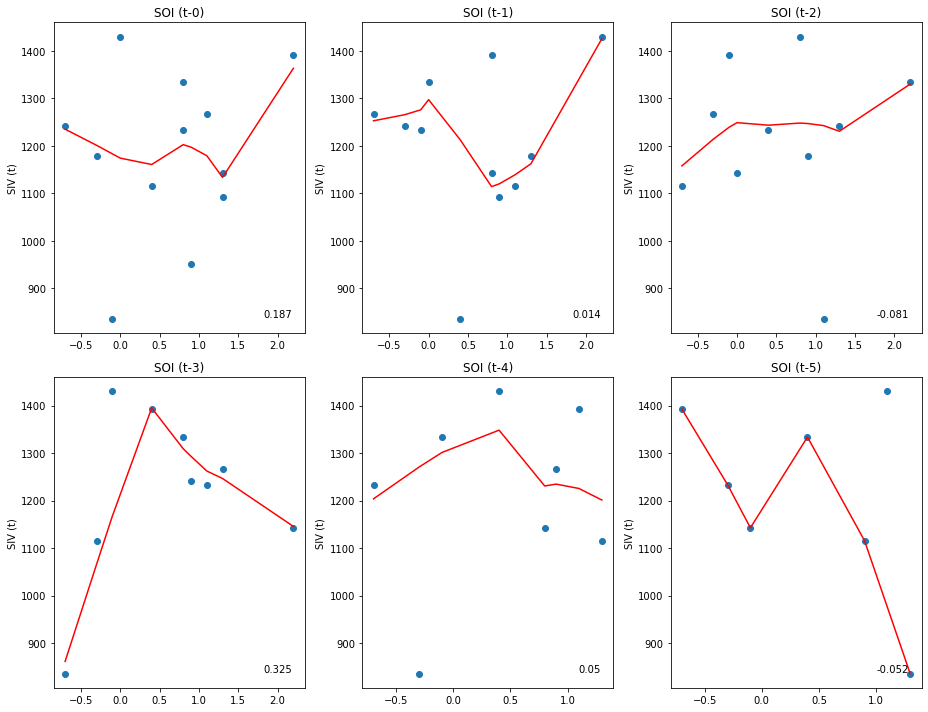

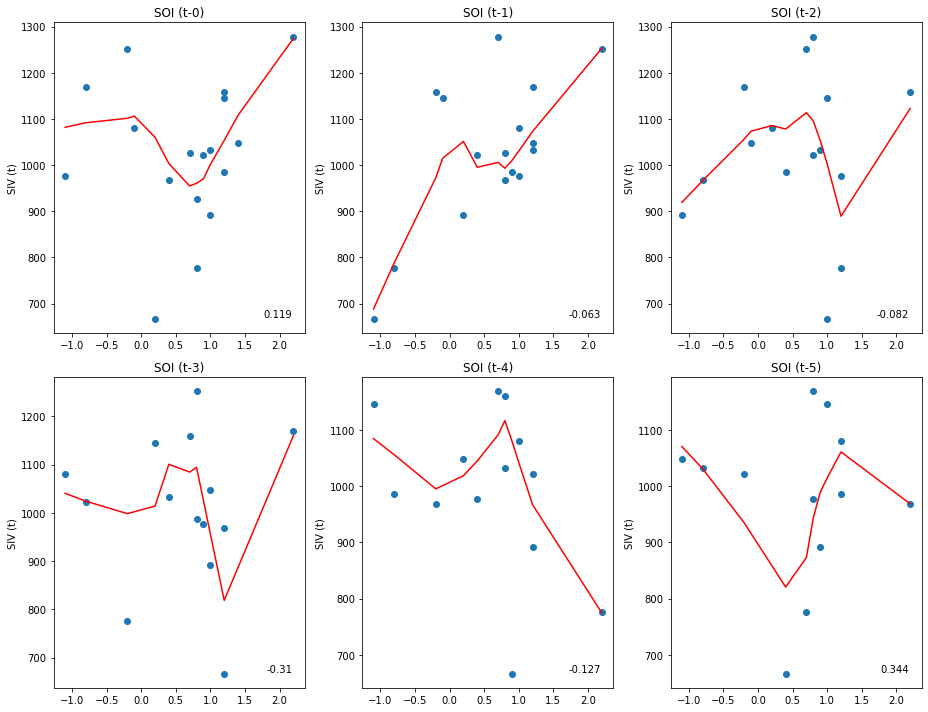

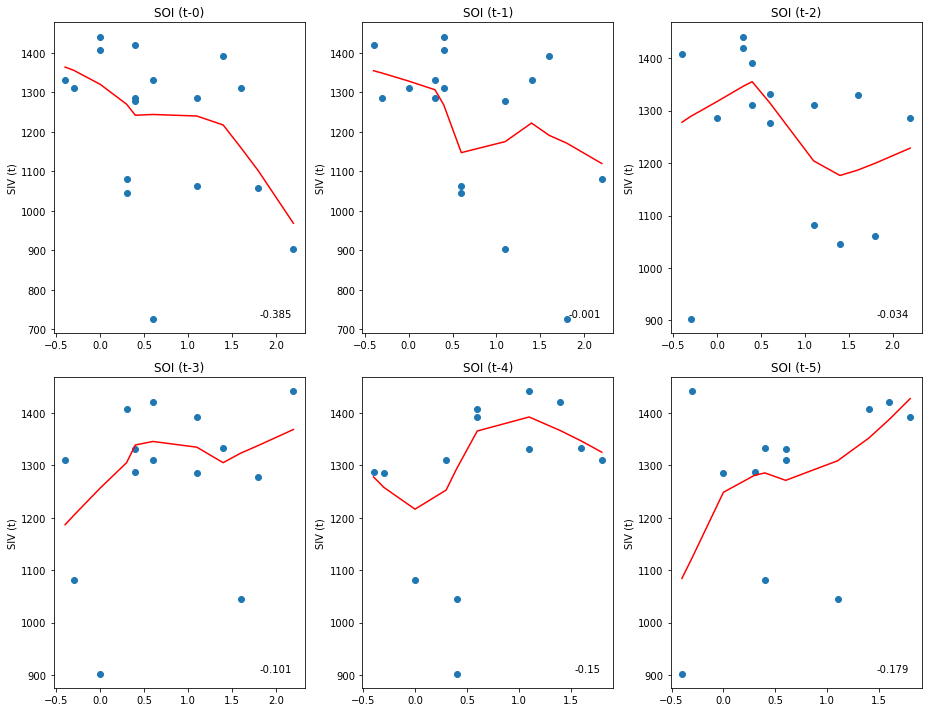

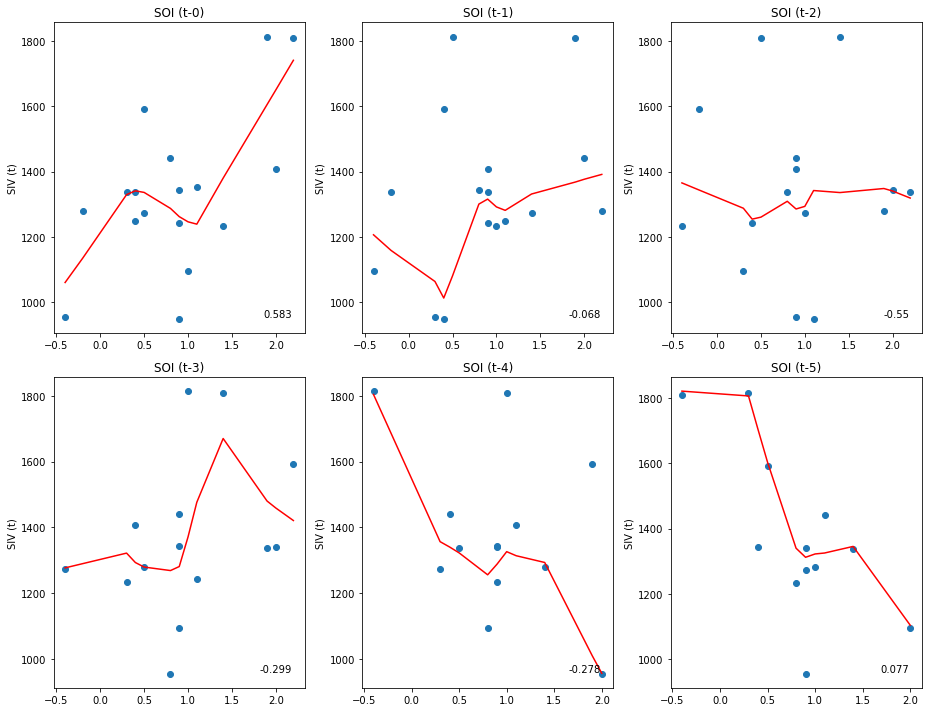

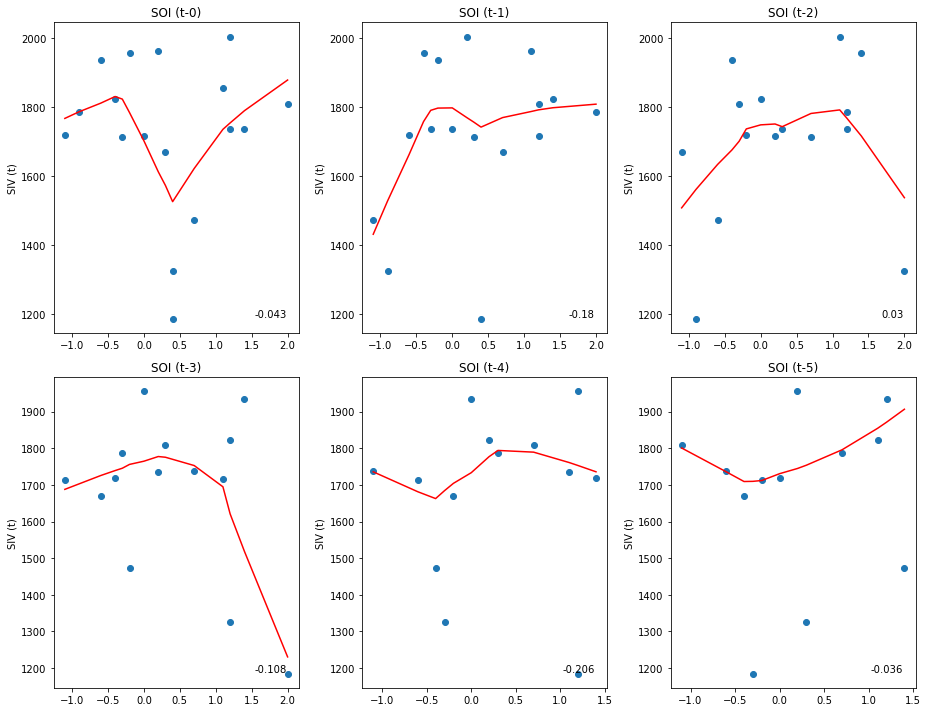

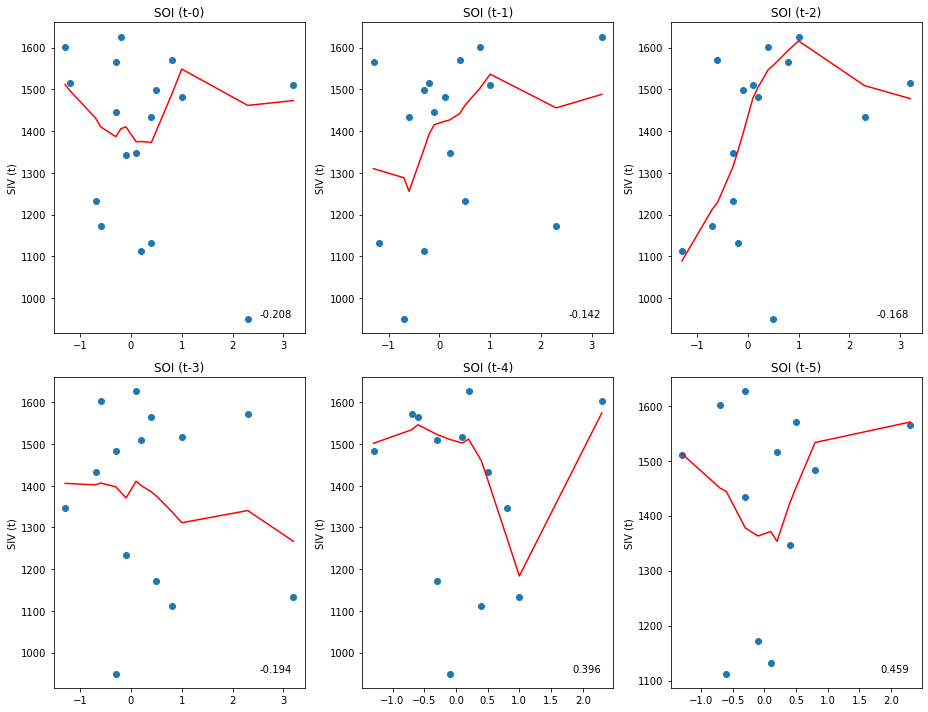

In [17]:
month_ccf_soi(df_new_soi)

## ASL

In [18]:
#-----Read in ASL as dataframe
asl_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/ASL_index.csv')

In [19]:
asl_df = asl_df.drop(["Lon", "Lat","SectorPres", "RelCenPres"], axis=1)
asl_df['Dates'] = asl_df['Dates'].astype('datetime64[ns]')
#print(asl_df)

In [20]:
# Get dates  for only May -October
asl_df = asl_df[(asl_df.Dates.dt.month >= 5) & (asl_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
asl_df = asl_df.set_index('Dates')
asl_df = asl_df.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
#asl_df  = asl_df.iloc[5:]
print(asl_df)

            ActCenPres
Dates                 
2002-10-01  986.911499
2003-05-01  967.435608
2003-06-01  985.111511
2003-07-01  969.911377
2003-08-01  972.973511
...                ...
2018-06-01  972.353699
2018-07-01  977.746094
2018-08-01  978.081421
2018-09-01  970.656189
2018-10-01  965.293152

[97 rows x 1 columns]


In [21]:
# # we now want the 'Dates' as a normal column and not an index
asl_df = asl_df.reset_index()
print(asl_df)

        Dates  ActCenPres
0  2002-10-01  986.911499
1  2003-05-01  967.435608
2  2003-06-01  985.111511
3  2003-07-01  969.911377
4  2003-08-01  972.973511
..        ...         ...
92 2018-06-01  972.353699
93 2018-07-01  977.746094
94 2018-08-01  978.081421
95 2018-09-01  970.656189
96 2018-10-01  965.293152

[97 rows x 2 columns]


In [22]:
# # Combining the SAM and SIV Dates
df_new_asl = asl_df.copy()
df_new_asl["SIV"] = vol_df["SIV"]
print(df_new_asl)

        Dates  ActCenPres          SIV
0  2002-10-01  986.911499   950.837862
1  2003-05-01  967.435608  1093.023526
2  2003-06-01  985.111511  1178.850939
3  2003-07-01  969.911377  1241.755970
4  2003-08-01  972.973511  1266.581174
..        ...         ...          ...
92 2018-06-01  972.353699  1482.574281
93 2018-07-01  977.746094  1510.433459
94 2018-08-01  978.081421  1626.566458
95 2018-09-01  970.656189  1516.098355
96 2018-10-01  965.293152  1132.882550

[97 rows x 3 columns]


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


def month_ccf_asl(df):
    x = [5, 6, 7, 8, 9, 10]
    df_selmons = []
    df_vol_selmons = []
    df_asl_selmons = []
    cdfs = []
    for i in x:
        df_selmon = df[df['Dates'].dt.month.isin([i])]
        ccf_df = statsmodels.tsa.stattools.ccf(df_selmon.ActCenPres, df_selmon.SIV, adjusted=False)
        ccf_df = pd.DataFrame(ccf_df, columns=['CCF'])
        df_selmons.append(df_selmon)
        print(ccf_df)
        cdfs.append(ccf_df)
        ## Separate the two columns
        # SIV #
        df_vol_selmon = df_selmon[['Dates', 'SIV']]
        df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
        df_vol_selmon = df_vol_selmon.set_index(['Dates'])
        df_vol_selmons.append(df_vol_selmon)
        # SOI #
        df_asl_selmon = df_selmon[['Dates', 'ActCenPres']]
        df_asl_selmon['Dates'] = df_asl_selmon['Dates'].dt.to_period('M')
        df_asl_selmon = df_asl_selmon.set_index(['Dates'])
        df_asl_selmons.append(df_asl_selmon)
        #return cdfs
    # PLOT #
    for x in range(6):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
        lag = 0
        for i in range(6):
            row = 0 if i <= 2 else 1
            col = i if i <= 2 else i - 3
            lowess = sm.nonparametric.lowess(df_vol_selmons[x].iloc[:, 0], df_asl_selmons[x].iloc[:, 0].shift(lag))
            axes[row, col].scatter(df_asl_selmons[x].shift(lag), df_vol_selmons[x])
            axes[row, col].set_title(f"ASL (t-{lag})")
            axes[row, col].set_ylabel("SIV (t)")
            axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
            axes[row, col].text(s=round(cdfs[x].loc[i][0], 3), x=.95, y=0.05, transform=axes[row, col].transAxes,
                                ha='right')  #ha, horizontal line
            lag += 1
        fig.tight_layout()
        plt.savefig(dir + str(x))


         CCF
0   0.255673
1   0.242345
2  -0.330697
3  -0.135921
4   0.142961
5   0.099808
6   0.063179
7   0.013711
8  -0.216098
9  -0.070615
10  0.063459
11  0.055521
12  0.000042
13 -0.051774
14  0.070138
15 -0.022945
         CCF
0  -0.173399
1  -0.198306
2  -0.244460
3  -0.115624
4  -0.001280
5  -0.058824
6   0.033191
7   0.178087
8   0.073607
9   0.123714
10  0.164030
11  0.093343
12  0.089043
13  0.101235
14 -0.027557
15  0.053524
         CCF
0  -0.089275
1  -0.224601
2  -0.052348
3   0.180521
4   0.022495
5   0.182491
6   0.056852
7   0.170857
8  -0.006017
9   0.015372
10 -0.105285
11 -0.080122
12  0.006841
13 -0.072486
14  0.000956
15 -0.009850
         CCF
0  -0.204487
1  -0.180340
2  -0.426025
3  -0.065513
4   0.056435
5   0.109913
6   0.021462
7   0.146175
8   0.150257
9   0.092537
10  0.025537
11  0.079353
12  0.011635
13 -0.045986
14  0.025193
15 -0.024471
         CCF
0   0.080740
1   0.067713
2  -0.075209
3  -0.341465
4  -0.352109
5  -0.181982
6  -0.144601
7  -0.118573

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_43875/2568138697.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_43875/2568138697.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asl_selmon['Dates'] = df_asl_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_43875/2568138697.py:27: SettingWithCopyWarning: 
A value is try

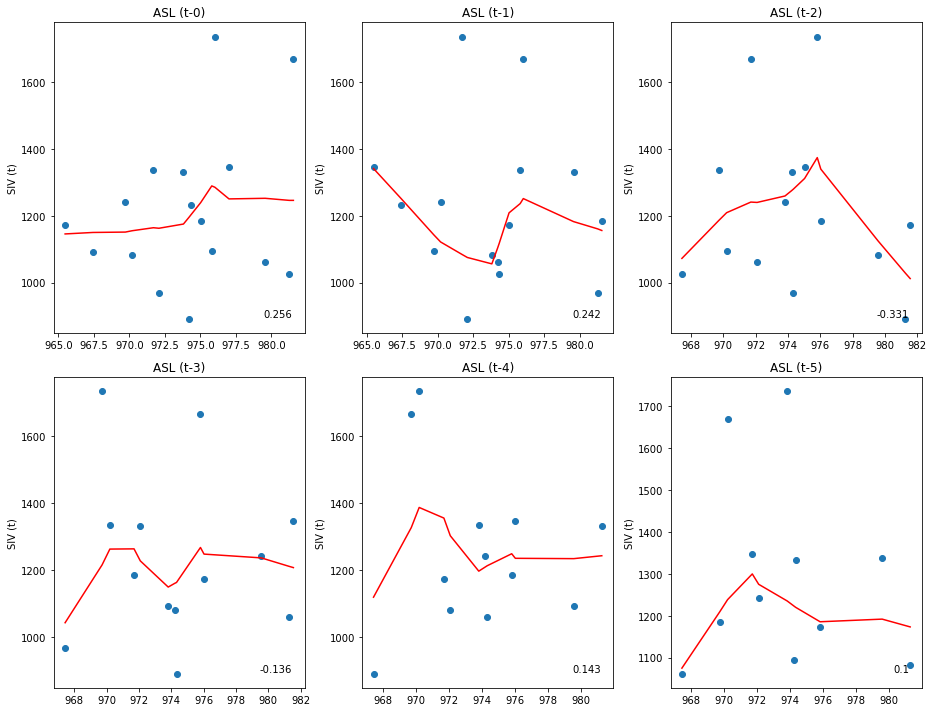

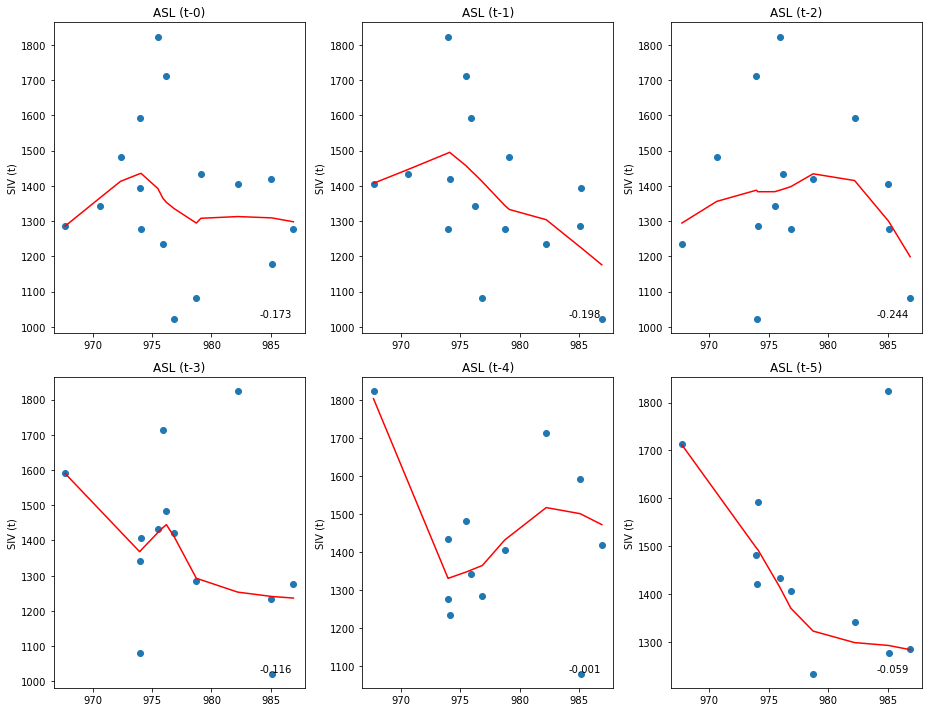

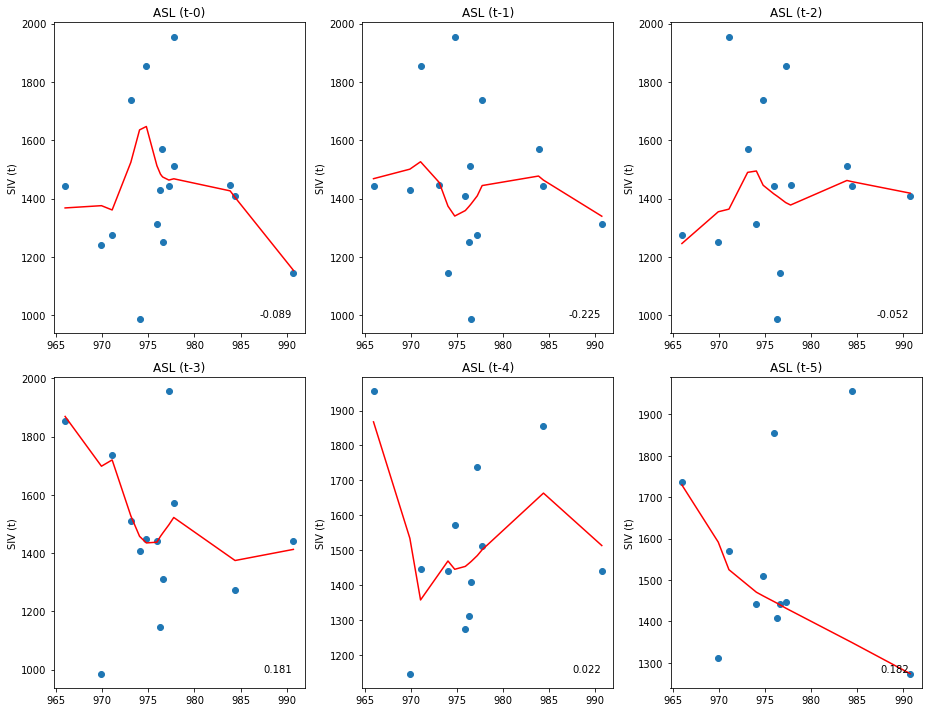

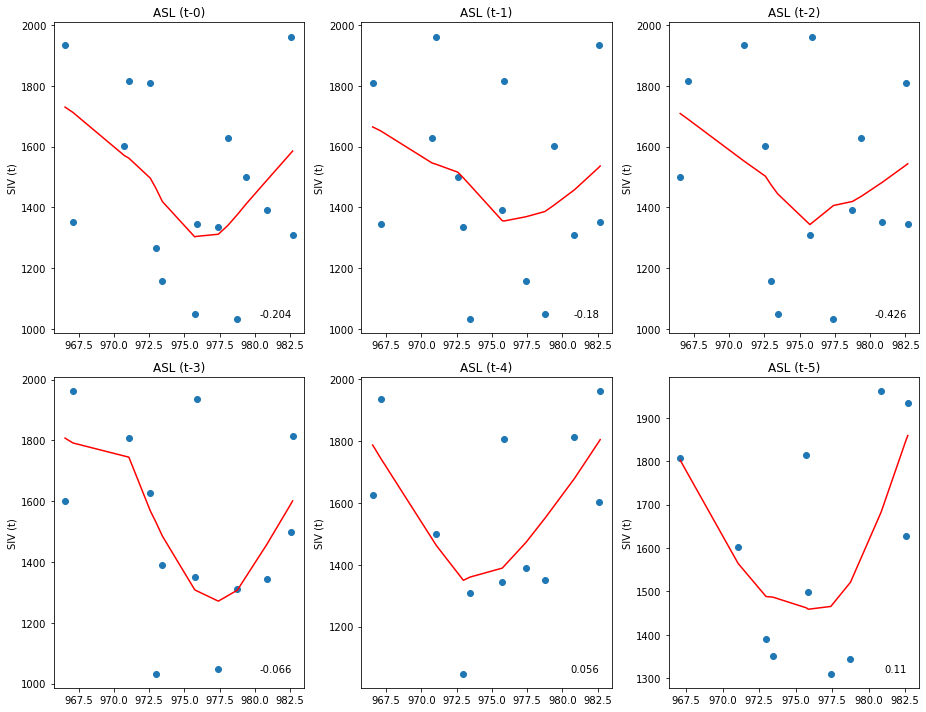

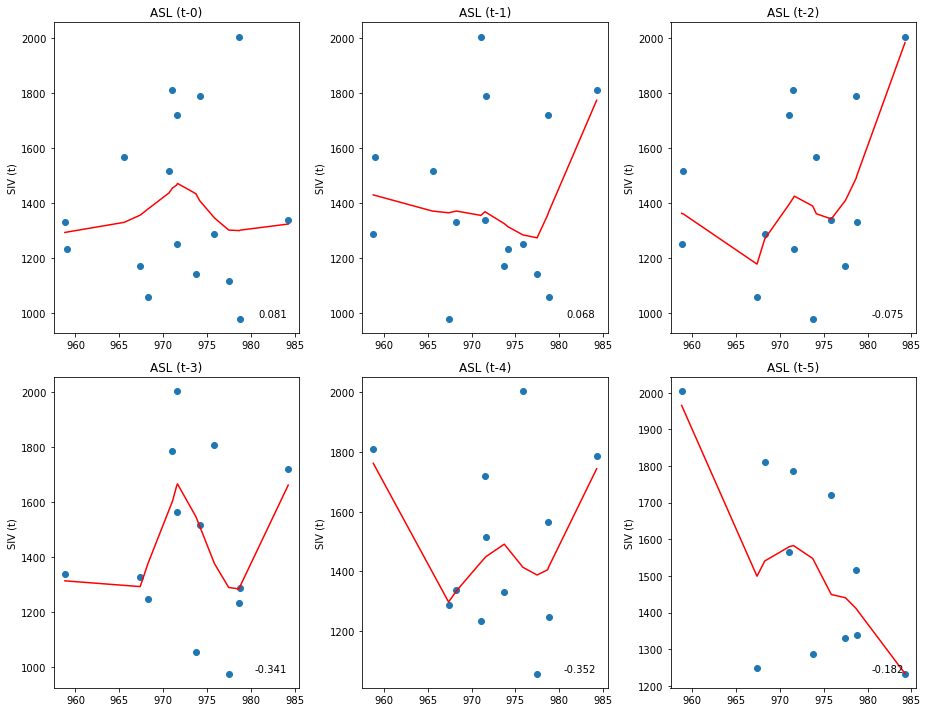

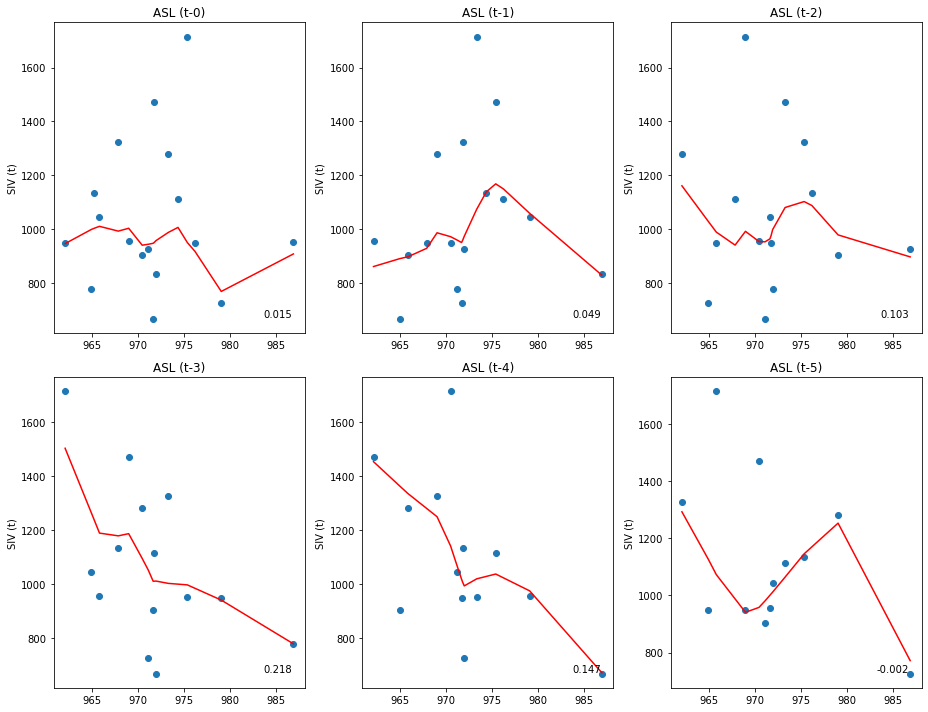

In [24]:
month_ccf_asl(df_new_asl)